Author: Faarah Sheek
# Automated Brain Tumor Classification via CNNs

## Project Objective

### The objective of this project is to develop and implement a Convolutional Neural Network (CNN) model capable of accurately classifying medical images of brain scans into four distinct categories based on the presence and type of brain tumor. By leveraging CNN's powerful image recognition capabilities, this model aims to assist in the diagnosis and classification of brain tumors, which is a crucial step in determining appropriate treatment pathways. The four categories of brain tumors will be used as the classification labels, allowing the model to differentiate between various types with high accuracy, aiding medical professionals in early detection and treatment planning.

### The data set used in this project was found on Kaggle. The link to the data set is as follows: https://www.kaggle.com/datasets/rafi01001/brain-tumour-classification



### The images of the brain scans will be classisified into four categories of tumor:
## - Glioma Tumor
## - Meningioma Tumor
## - No Tumor
## - Pituitary Tumor


### Using a labeled dataset of brain scan images, the model will learn features specific to each type of tumor and predict the tumor type in unseen images.

## 1. Dataset Preparation and Preprocessing

### Import Required Libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

### Google Drive is mounted to access the dataset within the Colab environment, without any specific output.

In [ ]:
drive.mount('/content/drive')

# Define paths to train and test directories in Google Drive
train_dir = '/content/drive/MyDrive/BrainTumor_1/Train'
test_dir = '/content/drive/MyDrive/BrainTumor_1/Test'
img_size = (128, 128)
batch_size = 32


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Set Up Image Data Generators for Training and Testing

In [ ]:
# Create ImageDataGenerators for train and test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 23256 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### The following showcases images of four scans each category offering a visual grasp of the dataset using the training dataset as input.

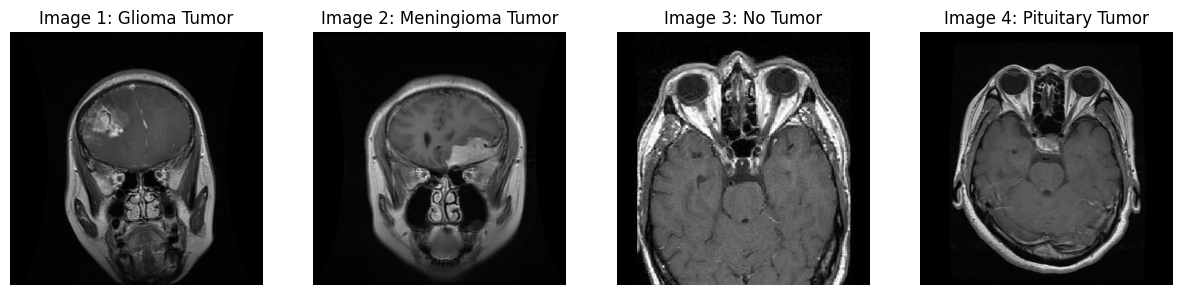

In [ ]:
import matplotlib.image as mpimg


image1_path = '/content/drive/MyDrive/BrainTumor_1/Train/glioma/0001.jpg'
image2_path = '/content/drive/MyDrive/BrainTumor_1/Train/meningioma/0001.jpg'
image3_path = '/content/drive/MyDrive/BrainTumor_1/Train/notumor/0001.jpg'
image4_path = '/content/drive/MyDrive/BrainTumor_1/Train/pituitary/0001.jpg'


try:

    plt.figure(figsize=(15, 5))


    I1 = mpimg.imread(image1_path)
    plt.subplot(1, 4, 1)
    plt.imshow(I1)
    plt.axis('off')
    plt.title("Image 1: Glioma Tumor")


    I2 = mpimg.imread(image2_path)
    plt.subplot(1, 4, 2)
    plt.imshow(I2)
    plt.axis('off')
    plt.title("Image 2: Meningioma Tumor")


    I3 = mpimg.imread(image3_path)
    plt.subplot(1, 4, 3)
    plt.imshow(I3)
    plt.axis('off')
    plt.title("Image 3: No Tumor")


    I4 = mpimg.imread(image4_path)
    plt.subplot(1, 4, 4)
    plt.imshow(I4)
    plt.axis('off')
    plt.title("Image 4: Pituitary Tumor")


    plt.show()

except FileNotFoundError:
    print("One or more image paths are incorrect. Please check the file paths.")


## 2. Model Architecture

### A CNN model is used with multiple layers to capture complex features in brain scan images.
### The architecture includes:
### - Convolutional layers with ReLU activation to capture features.
### - MaxPooling layers to down-sample images.
### - Dropout layers to reduce overfitting.
### - Fully connected dense layers with softmax output for classification.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])


## 3. Compiling the Model

### Compile the model with:
### - Optimizer: Adam, as it is widely used and effective for CNNs.
### - Loss Function: Categorical cross-entropy, appropriate for multi-class classification.
### - Metric: Accuracy, to track model performance during training.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## 4. Visualizing Training and Validation Performance

### The model is trained and to understand how the model’s performance evolves, we plot training
### and validation accuracy and loss across epochs.

Epoch 1/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1228s 2s/step - accuracy: 0.4909 - loss: 1.1073 - val_accuracy: 0.4867 - val_loss: 1.6513
Epoch 2/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1285s 2s/step - accuracy: 0.7228 - loss: 0.6913 - val_accuracy: 0.5591 - val_loss: 1.2641
Epoch 3/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1207s 2s/step - accuracy: 0.7932 - loss: 0.5227 - val_accuracy: 0.7712 - val_loss: 0.5689
Epoch 4/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1207s 2s/step - accuracy: 0.8408 - loss: 0.4171 - val_accuracy: 0.7834 - val_loss: 0.6433
Epoch 5/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1243s 2s/step - accuracy: 0.8641 - loss: 0.3528 - val_accuracy: 0.8131 - val_loss: 0.5491
Epoch 6/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1229s 2s/step - accuracy: 0.8802 - loss: 0.3222 - val_accuracy: 0.8429 - val_loss: 0.4300
Epoch 7/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1227s 2s/step - accuracy: 0.8927 - loss: 0.2890 - val_accuracy: 0.9100 - val_loss: 0.2674
Epoch 8/10
727/727 ━━━━━━━━━━━━━━━━━━━━ 1212s 2s/step - accuracy: 0.9037 - loss: 0.2681 - 

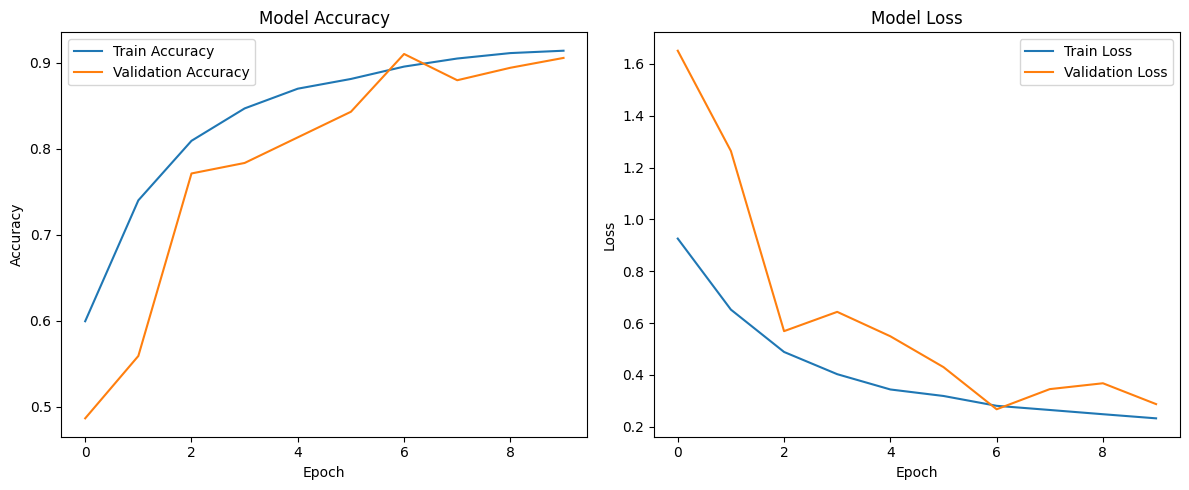

In [ ]:
# Compile the model with the specified optimizer, loss function, and metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model and capture the training history
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

# Plot both training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


As shown with each epoch, both the train accuracy and validation accuracy increase. The use of multiple epochs allows the model to progressively learn from the data thus improving its predictions whilst at the same time avoiding underfitting.

## 5. Evaluating Model Performance on Test Data

### To assess model performance on the test set, we use a confusion matrix, which provides a detailed breakdown of model predictions for each class.

41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step


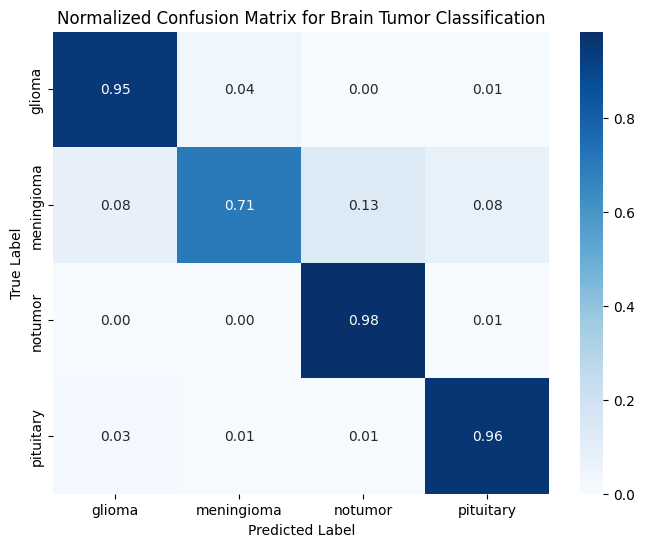

              precision    recall  f1-score   support

      glioma       0.89      0.95      0.92       300
  meningioma       0.93      0.71      0.80       306
     notumor       0.90      0.98      0.94       405
   pituitary       0.91      0.96      0.93       300

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.90      1311
weighted avg       0.91      0.91      0.90      1311



In [ ]:
# Step 1: Get True and Predicted Labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Generate and Normalize the Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 3: Plot the Normalized Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix for Brain Tumor Classification")
plt.show()


print(classification_report(y_true, y_pred, target_names=class_labels))

## 6. Testing the Model with New Images

### For practical application, the model can classify unseen brain scan images.
### The following code demonstrates loading a new image, preprocessing it, and making a prediction.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess image
def preprocess_tumor_image(image_path, target_size=(128, 128)):

    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0
    return np.expand_dims(image, axis=0)

# Prediction and classification
def predict_tumor_class(image, model, class_labels):
    predictions = model.predict(image)
    predicted_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_index]
    confidence = predictions[0][predicted_index]
    return predicted_class, confidence

class_labels = ['Glioma tumor', 'Meningioma tumor ', 'No tumor', 'Pituitary tumor']
image_path = '/content/drive/MyDrive/BrainTumor_1/Test/meningioma/0029.jpg'
new_image = preprocess_tumor_image(image_path)
predicted_class, confidence = predict_tumor_class(new_image, model, class_labels)
print(f'The predicted class for the new image is: {predicted_class}, with a confidence of: {confidence:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
The predicted class for the new image is: Glioma tumor, with a confidence of: 0.93


# 7. Summary

### In this project, a CNN model developed and trained for classifying brain tumors into four categories based on MRI images. The model's performance was evaluated using accuracy metrics, confusion matrix, and visualizations of training and validation progress, demonstrating its potential for aiding brain tumor diagnosis.